In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
podatki = pd.read_csv("hiphop_tracks_obogateno.csv", delimiter=';')

In [5]:
podatki.head(20)

,naslov,izvajalec,album,trajanje,eksplicitnost
0,Flashing Lights,Kanye West,Graduation,3:57,eksplicitna
1,Swimming Pools (Drank),Kendrick Lamar,Swimming Pools (Drank),4:08,eksplicitna
2,Heartbeat,Childish Gambino,Camp,4:25,ni_eksplicitna
3,Ms. Jackson,OutKast,Stankonia,4:32,eksplicitna
4,I Wonder,Kanye West,Graduation,4:03,eksplicitna
5,Fashion Killa,A$AP Rocky,LONG.LIVE.A$AP (Deluxe Version),3:56,eksplicitna
6,All Falls Down,Kanye West,The College Dropout,3:43,eksplicitna
7,Gold Digger,Kanye West,Late Registration,3:28,eksplicitna
8,Kiss Me Thru The Phone,Soulja Boy,iSouljaBoyTellem,3:13,ni_eksplicitna
9,Stronger,Kanye West,Graduation,5:12,eksplicitna


In [11]:
df = pd.read_csv('hiphop_tracks_obogateno.csv', delimiter=';')

#funkcija, ki pretvori dolžine skladb v sekunde
def pretvori_trajanje(trajanje_str):
    try:
        minute, sekunde = trajanje_str.split(':')
        return int(minute) * 60 + int(sekunde)
    except:
        return 0  # Če ni podatka, vrne 0 sekund

df['trajanje_s'] = df['trajanje'].apply(pretvori_trajanje)


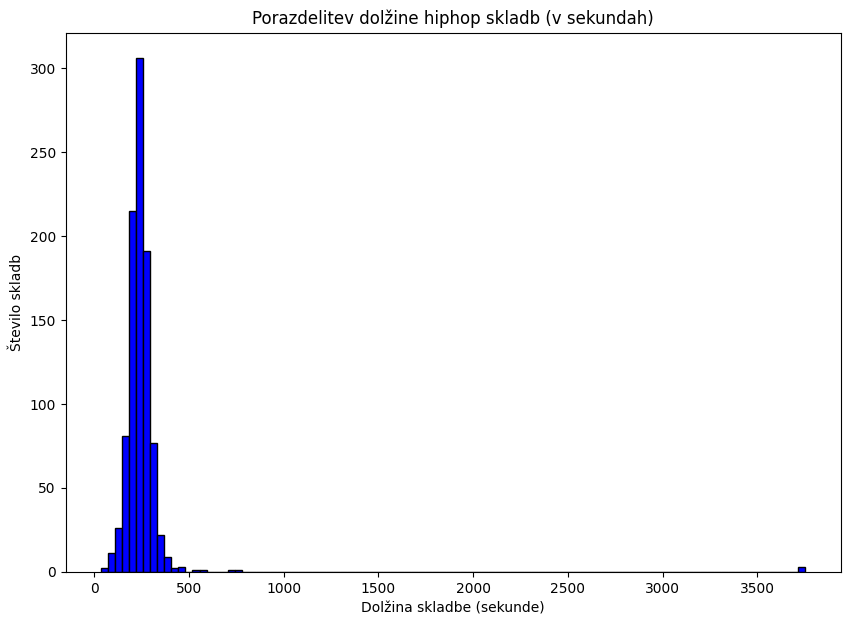

In [87]:
#nariše histogram dolžin skladb
plt.figure(figsize=(10,7))
plt.hist(df['trajanje_s'],bins=100, color='blue', edgecolor='black')
plt.title('Porazdelitev dolžine hiphop skladb (v sekundah)')
plt.xlabel('Dolžina skladbe (sekunde)')
plt.ylabel('Število skladb')
plt.show()


Histogram nam prikazuje, da je večino skladb dolgih od 200 do 300 sekund kar je približno od 3 do 5 minut. Presenetilo pa me je dejstvo, da imamo nekaj pesmi z dolžino več kot 3000 sekund, kar je skoraj ena ura. Zanimalo me je ali je to napaka ali pa dejansko obstajajo takšne pesmi in katere so. Zato sem naredil naslednjo tabelo: 

In [90]:
dolge_skladbe = df[df['trajanje_s'] > 3000]
dolge_skladbe[['naslov', 'izvajalec', 'album', 'trajanje', 'trajanje_s', 'eksplicitnost']]


,naslov,izvajalec,album,trajanje,trajanje_s,eksplicitnost
595,Feel So Good,Mase,Rolling 200 Deep,62:33,3753.0,eksplicitna
770,?,OutKast,Rolling 200 Deep,62:33,3753.0,eksplicitna
925,Crush on You,Lil' Kim,Rolling 200 Deep,62:33,3753.0,eksplicitna


Po iskanju skladb na platformi Spotify sem ugotovil, da so podatki napačni in izgleda, da se je Deezer pri dolžini le-teh zmotil. To mi je dalo vedeti, da kljub temu, da je Deezer priznana baza podatkov vseeno naredijo napako. Spodaj sem naredil graf skladb, ki so v okvirju normalne dolžine. (V nadaljevanju skladb, ki imajo napako v dolžini, ne bom več analiziral skupaj s preostalimi)

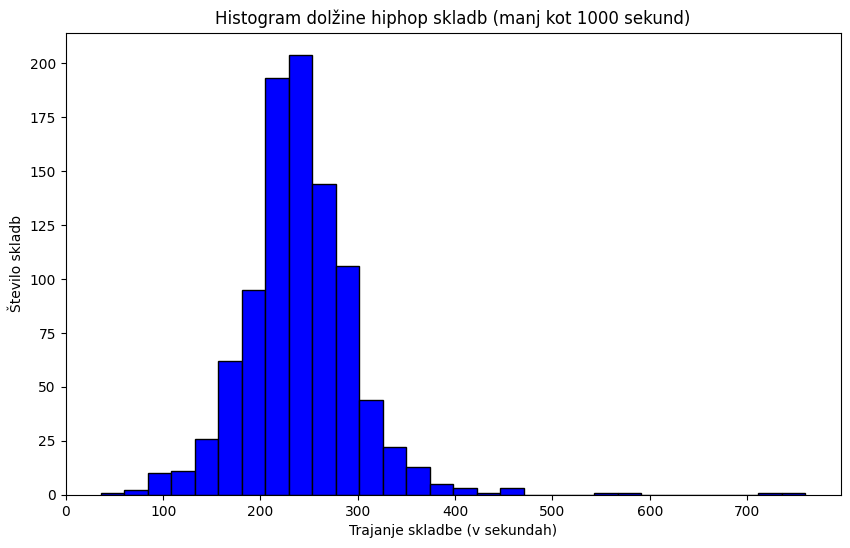

In [93]:

#filtrira skladbe krajše od 1000 sekund
df_normalne = df[df['trajanje_s'] < 1000]

#nariše histogram dolžin skladb pod 1000 sekund
plt.figure(figsize=(10,6))
plt.hist(df_krajse['trajanje_s'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title('Histogram dolžine hiphop skladb (manj kot 1000 sekund)')
plt.xlabel('Trajanje skladbe (v sekundah)')
plt.ylabel('Število skladb')
plt.show()


In [103]:
df_daljse = df_normalne[df_normalne['trajanje_s'] > 400]
df_daljse[['naslov', 'izvajalec', 'album', 'trajanje', 'trajanje_s', 'eksplicitnost']]

,naslov,izvajalec,album,trajanje,trajanje_s,eksplicitnost
18,Runaway,Kanye West,My Beautiful Dark Twisted Fantasy,9:08,548.0,eksplicitna
58,Stan,Eminem,Curtain Call: The Hits,6:43,403.0,eksplicitna
177,"Sing About Me, I'm Dying of Thirst",Kendrick Lamar,"good kid, m.A.A.d city (Deluxe)",12:04,724.0,eksplicitna
197,Last Call,Kanye West,The College Dropout,12:40,760.0,eksplicitna
265,Dance With the Devil,Immortal Technique,"Revolutionary, Vol. 1 (Bonus Edition)",9:39,579.0,eksplicitna
372,We Major,Kanye West,Late Registration,7:28,448.0,eksplicitna
393,SpottieOttieDopaliscious,OutKast,Aquemini,7:07,427.0,eksplicitna
465,3030,Deltron 3030,Deltron 3030,7:29,449.0,ni_eksplicitna
717,House of Balloons / Glass Table Girls,The Weeknd,House Of Balloons (Original),6:47,407.0,eksplicitna
744,Blame Game,Kanye West,My Beautiful Dark Twisted Fantasy,7:50,470.0,eksplicitna


In [104]:
št_skladb = len(df_daljse)
print('Število skladb daljših od 400s je:', št_skladb)

Število skladb daljših od 400s je: 11


Ugotovil sem, da je daljših skladb 11 in avtor številnih je Kanye West. Zato me je zanimalo, če je Ye najbolj popularn izvajalec med top 1000 skladbami. Spodaj je tabela vseh avtorjev in stevilo komadov med top 1000.

In [106]:
df.head()

,naslov,izvajalec,album,trajanje,eksplicitnost,trajanje_s
0,Flashing Lights,Kanye West,Graduation,3:57,eksplicitna,237.0
1,Swimming Pools (Drank),Kendrick Lamar,Swimming Pools (Drank),4:08,eksplicitna,248.0
2,Heartbeat,Childish Gambino,Camp,4:25,ni_eksplicitna,265.0
3,Ms. Jackson,OutKast,Stankonia,4:32,eksplicitna,272.0
4,I Wonder,Kanye West,Graduation,4:03,eksplicitna,243.0


In [121]:
st_glasb_po_izvajalcu = df['izvajalec'].value_counts() #prešteje število pesmi po izvajalcu
st_glasb_po_izvajalcu = st_glasb_po_izvajalcu.reset_index() #serijo, ki ima indeks spremeni v obicajno tabelo
st_glasb_po_izvajalcu.columns = ['izvajalec', 'število_pesmi']
st_glasb_po_izvajalcu

,izvajalec,število_pesmi
0,Kanye West,60
1,Eminem,56
2,Kendrick Lamar,31
3,Beastie Boys,26
4,Drake,24
...,...,...
255,3OH!3,1
256,Quasimoto,1
257,K7,1
258,TLC,1


Moja domneva, da je Kanye West G.O.A.T. je bila resnična, saj je za 4 pesmi boljši od Eminema. Na koncu me je zanimalo še koliko pesmi med top 1000 je eksplicitnih in koliko ne. Vemo namreč, da so predvsem v hip-hop sceni eksplicitna besedila zelo popularna.

In [123]:

stevilo_eksplicitnih = (df['eksplicitnost'] == 'eksplicitna').sum()
stevilo_ne_eksplicitnih = (df['eksplicitnost'] == 'ni_eksplicitna').sum()

print(f"Število eksplicitnih pesmi: {stevilo_eksplicitnih}")
print(f"Število neeksplicitnih pesmi: {stevilo_ne_eksplicitnih}")


Število eksplicitnih pesmi: 658
Število neeksplicitnih pesmi: 342


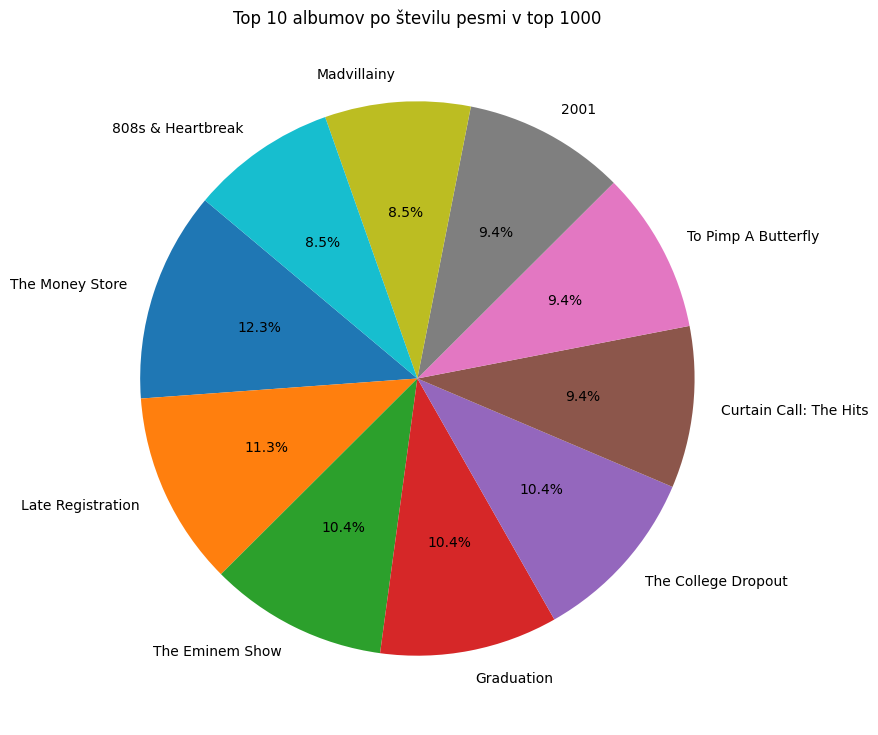

In [147]:

filtrirani = df[df['album'] != 'Ni podatka'] #filtrira pesmi na tiste ki so v albume in tiste, ki niso

albumi_stevilo = filtrirani_df['album'].value_counts().head(10) #prešteje albume

#nriše tortni diagram
plt.figure(figsize=(9, 9))
plt.pie(albumi_stevilo, labels=albumi_stevilo.index,autopct='%1.1f%%', startangle=140)
plt.title('Top 10 albumov po številu pesmi v top 1000')
plt.show()



Ugotovili smo, da je top 10 albumov po stevilu pesmi zelo blizu in sicer najvec skladb je iz albuma The Money Store.